# Real-world Data Wrangling

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

# Problem Statement

This project investigates the relationship between individual player performance and team success in NBA basketball during the 2015 season. Using two datasets—NBA Player Stats (all_seasons.csv) and NBA Team Stats (seasons_stats.csv)—we aim to uncover how individual contributions such as points, assists, and rebounds correlate with team-level outcomes like wins, losses, and scoring margins.

The analysis will involve filtering data for the 2015 season, cleaning and aligning the datasets, and generating insights into factors that influence team success. This project highlights the application of data wrangling, analysis, and integration techniques to sports performance data.

## Dataset 1: NBA Player Stats (`all_seasons.csv`)

- **Type**: CSV File
- **Method**: The data was gathered programmatically from a public online source. The dataset was filtered to include only the year 2015 and relevant variables for analysis.

### Dataset Variables:
1. **team_id**: Identifier for the NBA team.
2. **year_id**: The year of the data (2015).
3. **pts**: Total points scored by the team in a game.
4. **opp_pts**: Total points scored against the team in a game.
5. **game_result**: Result of the game (`W` for win, `L` for loss).
6. **game_location**: Location of the game (`H` for home, `A` for away).

This dataset focuses on team-level performance metrics during the 2015 NBA season, which will be analyzed alongside Dataset 2 for deeper insights.

In [3]:
import pandas as pd
import requests
from io import StringIO

# URL for the dataset
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"

# Programmatically download the dataset
response = requests.get(url)

In [4]:
# Check if the download was successful
if response.status_code == 200:
    # Load the dataset into a pandas DataFrame
    all_seasons = pd.read_csv(StringIO(response.text))
    
    # Inspect the column names and unique year values
    print("Available Columns:", all_seasons.columns.tolist())
    print("Unique Years in 'year_id':", all_seasons['year_id'].unique())
    
    # Select only the relevant columns
    selected_columns = ['team_id', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']
    filtered_all_seasons = all_seasons[selected_columns]
    
    # Filter for the year 2015
    filtered_all_seasons = filtered_all_seasons[filtered_all_seasons['year_id'] == 2015]
    
    # Display the first few rows of the filtered dataset
    print(filtered_all_seasons.head())
    
    # Check the size of the filtered dataset
    print(f"Filtered dataset size: {filtered_all_seasons.shape[0]} entries")
    
    # Save the filtered dataset to a CSV file
    filtered_all_seasons.to_csv("filtered_all_seasons_2015.csv", index=False)
    print("Filtered dataset saved as 'filtered_all_seasons_2015.csv'")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")

Available Columns: ['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game', 'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i', 'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i', 'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes']
Unique Years in 'year_id': [1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
       team_id  year_id  pts  opp_pts game_result game_location
123692     HOU     2015  108       90           W             A
123693     LAL     2015   90      108           L             H
123694     NOP     2015  101       84           W             H
123695     ORL     2015   84      101           L             A
123696     SA

## Dataset 2: NBA Team Stats (`seasons_stats.csv`)

- **Type**: CSV File
- **Method**: The data was manually downloaded from a public source and filtered to include only the year 2015 and relevant variables for analysis.

### Dataset Variables:
1. **Player**: Name of the player.
2. **Year**: The season/year of the data (2015).
3. **Team**: Team name or abbreviation.
4. **Games Played (G)**: Total games played by the player during the season.
5. **Points Per Game (PTS)**: Average points scored by the player per game.
6. **Rebounds Per Game (REB)**: Average rebounds by the player per game.
7. **Assists Per Game (AST)**: Average assists by the player per game.

This dataset focuses on player-level performance metrics during the 2015 NBA season and complements the team-level data from Dataset 1, allowing for analysis of how individual performance contributes to team outcomes.

In [5]:
# Import pandas
import pandas as pd
# Load the manually downloaded dataset
team_stats = pd.read_csv("Seasons_Stats.csv")

In [6]:
# Inspect the first few rows to verify the structure
print("Available Columns:", team_stats.columns.tolist())
print(team_stats.head())

# Filter for the year 2015
team_stats_2015 = team_stats[team_stats['Year'] == 2015]

# Select only the relevant columns
selected_columns = ['Player', 'Year', 'Tm', 'G', 'PTS', 'TRB', 'AST']
filtered_team_stats = team_stats_2015[selected_columns]

# Display the first few rows of the filtered dataset
print(filtered_team_stats.head())

# Check the size of the filtered dataset
print(f"Filtered dataset size: {filtered_team_stats.shape[0]} entries")

# Save the filtered dataset to a CSV file
filtered_team_stats.to_csv("filtered_team_stats_2015.csv", index=False)
print("Filtered dataset saved as 'filtered_team_stats_2015.csv'")

Available Columns: ['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  

## 2. Assess data

## Dataset 1

In [7]:
# Visual inspection of Dataset 1
import pandas as pd
all_seasons_2015 = pd.read_csv("filtered_all_seasons_2015.csv")
all_seasons_2015.head()

,team_id,year_id,pts,opp_pts,game_result,game_location
0,HOU,2015,108,90,W,A
1,LAL,2015,90,108,L,H
2,NOP,2015,101,84,W,H
3,ORL,2015,84,101,L,A
4,SAS,2015,101,100,W,H


In [8]:
all_seasons_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team_id        2622 non-null   object
 1   year_id        2622 non-null   int64 
 2   pts            2622 non-null   int64 
 3   opp_pts        2622 non-null   int64 
 4   game_result    2622 non-null   object
 5   game_location  2622 non-null   object
dtypes: int64(3), object(3)
memory usage: 123.0+ KB


### Visual Inspection Results

- The dataset contains **2,622 entries** and **6 columns**: `team_id`, `year_id`, `pts`, `opp_pts`, `game_result`, and `game_location`.
- All columns appear to have **non-null values**, but we need to programmatically check for potential null-like placeholders (e.g., empty strings or special symbols) that may not be recognized as `NaN`.
- Column data types seem appropriate for their content:
  - `year_id`, `pts`, and `opp_pts` are integers.
  - `team_id`, `game_result`, and `game_location` are objects (likely strings).
- Next, we will inspect for missing values or invalid entries in the dataset programmatically.

In [9]:
# Check for missing values in the dataset
missing_values = all_seasons_2015.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 team_id          0
year_id          0
pts              0
opp_pts          0
game_result      0
game_location    0
dtype: int64


In [10]:
# Check for null-like placeholders (empty strings, unusual symbols)
placeholder_values = (all_seasons_2015 == '').sum()
print("\nNull-like Placeholder Values:\n", placeholder_values)


Null-like Placeholder Values:
 team_id          0
year_id          0
pts              0
opp_pts          0
game_result      0
game_location    0
dtype: int64


### Programmatic Inspection for Missing or Invalid Data

- **Missing Values**:
  - No missing values (`NaN`) were detected in any column using `.isnull().sum()`.
- **Null-like Placeholders**:
  - No empty strings (`''`) or similar placeholders were detected in any column.

In [11]:
# Statistical summary to check for inconsistencies in numerical data
print("\nStatistical Summary of Numerical Columns:\n", all_seasons_2015.describe())


Statistical Summary of Numerical Columns:
        year_id          pts      opp_pts
count   2622.0  2622.000000  2622.000000
mean    2015.0   100.047292   100.047292
std        0.0    11.765905    11.765905
min     2015.0    65.000000    65.000000
25%     2015.0    92.000000    92.000000
50%     2015.0   100.000000   100.000000
75%     2015.0   107.000000   107.000000
max     2015.0   144.000000   144.000000


- **Statistical Summary**:
  - The `pts` (points scored) and `opp_pts` (opponent points) columns seem reasonable:
    - Minimum: 65 points (likely a low-scoring game).
    - Maximum: 144 points (a high-scoring game).
    - Mean: Approximately 100 points, which aligns with typical NBA scoring averages.
  - The `year_id` column correctly shows a single year (2015) for all entries, confirming that our filtering was accurate.

In [12]:
# Visually inspect for potential duplicate rows by sampling the data
all_seasons_2015.sample(10)

,team_id,year_id,pts,opp_pts,game_result,game_location
1437,NOP,2015,115,100,W,H
430,MEM,2015,99,93,W,A
821,DAL,2015,102,105,L,H
409,CHI,2015,109,114,L,A
1417,MIL,2015,95,88,W,H
58,LAL,2015,104,127,L,A
723,TOR,2015,95,82,W,H
2435,ATL,2015,85,91,L,A
449,CHO,2015,101,106,L,H
887,NOP,2015,100,107,L,A


In [13]:
# Count duplicate rows in the dataset
duplicate_rows = all_seasons_2015.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Display examples of duplicate rows (if any)
duplicate_examples = all_seasons_2015[all_seasons_2015.duplicated()]
print("\nExamples of duplicate rows:\n", duplicate_examples.head())

Number of duplicate rows: 49

Examples of duplicate rows:
     team_id  year_id  pts  opp_pts game_result game_location
94      HOU     2015  104       93           W             A
148     DET     2015   98       95           W             H
404     TOR     2015  104      100           W             H
793     LAC     2015  106      102           W             H
906     DAL     2015  112      107           W             H


### Quality Issue 1: Duplicate Rows

#### Type: Uniqueness

#### Inspecting the Dataframe Visually:
- By sampling the dataset (`sample(10)`), no obvious duplicates were visible. Duplicate rows are often not easily noticeable in large datasets without programmatic checks.

#### Inspecting the Dataframe Programmatically:
- Using `.duplicated().sum()`, we identified **49 duplicate rows** in the dataset.
- Examples of duplicate rows were extracted, showing repeated records for teams like `HOU`, `DET`, and `DAL`.

#### Issue and Justification:
Duplicate rows are a data quality issue because they can bias analysis by inflating aggregated metrics (e.g., total points scored). Programmatic methods like `.duplicated()` are essential to detect such issues in large datasets efficiently. Removing duplicates in the cleaning step will ensure accurate and reliable analysis.

In [14]:
# Check column names Visually
print("Column Names:", all_seasons_2015.columns.tolist())

Column Names: ['team_id', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']


In [15]:
# Inspect values in the 'team_id' column Programmatically
print("\nSample values from 'team_id':\n", all_seasons_2015['team_id'].sample(10))


Sample values from 'team_id':
 2024    TOR
2448    MIL
567     SAC
967     DAL
1478    CHO
1170    MIL
1330    MIL
93      MEM
247     PHI
1914    CHI
Name: team_id, dtype: object


### Quality Issue 2: Unclear Column Naming

#### Type: Consistency

#### Inspecting the Dataframe Visually:
- The column names were inspected using `.columns.tolist()`. The `team_id` column name is not explicit and may lead to confusion. It represents team abbreviations (e.g., `HOU` for Houston Rockets, `LAL` for Los Angeles Lakers), but the name implies it might contain unique numeric team identifiers.

#### Inspecting the Dataframe Programmatically:
- A sample of values from the `team_id` column was extracted. Examples include `TOR`, `BRK`, and `MIN`, which are team abbreviations.
- These values confirm that the column does not contain unique identifiers but rather team codes. The current name does not clearly describe its purpose.

#### Issue and Justification:
- The name `team_id` is misleading, as it does not reflect the fact that the column contains team abbreviations. Renaming this column to `team_abbreviation` would make it more descriptive and user-friendly.
- Clear column names reduce ambiguity and improve the interpretability of the dataset, especially when integrating with other datasets or performing analysis.

In [16]:
# Visually
# Display the column names
print("Column Names:", all_seasons_2015.columns.tolist())

# Display a random sample of rows to ensure variables are stored in columns
print("\nSample Rows:\n", all_seasons_2015.sample(5))

Column Names: ['team_id', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']

Sample Rows:
      team_id  year_id  pts  opp_pts game_result game_location
134      WAS     2015   96       94           W             H
2558     CHI     2015   99       96           W             H
2194     SAS     2015  103       89           W             H
2212     BRK     2015  111      106           W             H
1087     MEM     2015   95      106           L             A


In [17]:
# Programmatically
# Check unique values in game_result and game_location to confirm their structure
print("Unique values in 'game_result':", all_seasons_2015['game_result'].unique())
print("Unique values in 'game_location':", all_seasons_2015['game_location'].unique())

Unique values in 'game_result': ['W' 'L']
Unique values in 'game_location': ['A' 'H' 'N']


### Tidiness Issue 1: Ambiguous Abbreviations in 'game_location'

#### Rule Violated: Each variable forms a column

#### Inspecting the Dataframe Visually:
- The `game_location` column uses abbreviations (`A`, `H`, `N`) to represent Away, Home, and Neutral game locations. These abbreviations were identified during visual and programmatic checks.

#### Inspecting the Dataframe Programmatically:
- The unique values in the column were inspected using `.unique()`. The results confirm the presence of three values: `['A', 'H', 'N']`.

#### Issue and Justification:
- While the column represents a single variable, the use of abbreviations may be unclear to some users and could cause misinterpretation. Expanding these values into full names (`Away`, `Home`, `Neutral`) would improve readability and make the dataset more user-friendly.

In [18]:
# Display the column names Visually
print("Column Names:", all_seasons_2015.columns.tolist())

Column Names: ['team_id', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']


In [19]:
# Display a random sample of rows Visually
print("\nSample Rows:\n", all_seasons_2015.sample(5))


Sample Rows:
      team_id  year_id  pts  opp_pts game_result game_location
1156     DET     2015   94      105           L             H
2172     ATL     2015  100      115           L             A
2070     ATL     2015   95      114           L             H
2546     CHI     2015   99       92           W             A
541      TOR     2015  123      104           W             A


In [20]:
# Programmatically
# Count unique teams and total rows to confirm game-level granularity
unique_teams = all_seasons_2015['team_id'].nunique()
print("Number of unique teams:", unique_teams)

Number of unique teams: 30


In [21]:
# Count total rows
total_rows = all_seasons_2015.shape[0]
print("Total rows in dataset:", total_rows)

Total rows in dataset: 2622


In [22]:
# Check how many rows exist per team
rows_per_team = all_seasons_2015.groupby('team_id').size()
print("\nSample of rows per team:\n", rows_per_team.head())


Sample of rows per team:
 team_id
ATL    98
BOS    86
BRK    88
CHI    94
CHO    82
dtype: int64


### Tidiness Issue 2: Single Observational Unit (Team-Level)

#### Rule Violated: Each type of observational unit forms a table

#### Inspecting the Dataframe Visually:
- By sampling the rows and reviewing columns (`team_id`, `pts`, `opp_pts`, `game_result`), it is evident that the dataset represents team-level statistics, with each row corresponding to a single game.

#### Inspecting the Dataframe Programmatically:
- The dataset contains 30 unique teams (`team_id`), which matches the structure of the NBA.
- The total number of rows is 2,622, indicating multiple rows per team (one for each game).
- Grouped analysis of `rows_per_team` shows that each team has multiple entries, confirming team-level granularity.

#### Issue and Justification:
- This dataset exclusively represents **team-level statistics**. If merged with player-level data in the future, it will mix different observational units (team vs. player), requiring careful handling to maintain clarity in granularity.

## Dataset 2

In [23]:
# Load Dataset 2
team_stats_2015 = pd.read_csv("filtered_team_stats_2015.csv")

In [24]:
# Visual inspection
team_stats_2015.head()

,Player,Year,Tm,G,PTS,TRB,AST
0,Quincy Acy,2015.0,NYK,68.0,398.0,301.0,68.0
1,Jordan Adams,2015.0,MEM,30.0,94.0,28.0,16.0
2,Steven Adams,2015.0,OKC,70.0,537.0,523.0,66.0
3,Jeff Adrien,2015.0,MIN,17.0,60.0,77.0,15.0
4,Arron Afflalo,2015.0,TOT,78.0,1035.0,247.0,129.0


In [25]:
team_stats_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Year    651 non-null    float64
 2   Tm      651 non-null    object 
 3   G       651 non-null    float64
 4   PTS     651 non-null    float64
 5   TRB     651 non-null    float64
 6   AST     651 non-null    float64
dtypes: float64(5), object(2)
memory usage: 35.7+ KB


### Visual Inspection Results

- The dataset contains **651 entries** and **7 columns**: `Player`, `Year`, `Tm`, `G`, `PTS`, `TRB`, and `AST`.
- All columns appear to have **non-null values** based on the `.info()` output.
- Column data types seem appropriate for their content:
  - `Player` and `Tm` are objects (likely strings).
  - `Year`, `G`, `PTS`, `TRB`, and `AST` are numeric (floats).
- Initial inspection of the rows confirms the dataset contains **player-level statistics for the 2015 season**.

In [26]:
# Check for missing values in the dataset
missing_values = team_stats_2015.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Player    0
Year      0
Tm        0
G         0
PTS       0
TRB       0
AST       0
dtype: int64


In [27]:
# Check for duplicate rows
duplicate_rows = team_stats_2015.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


### Programmatic Inspection Results

- **Missing Values**:
  - No missing values (`NaN`) were detected in any column using `.isnull().sum()`.

- **Duplicate Rows**:
  - No duplicate rows were identified in the dataset using `.duplicated().sum()`.

The dataset appears clean with respect to missing values and duplicates. Next, we will inspect the consistency of numerical values and other potential quality issues.

In [28]:
# Display statistical summary of numeric columns
print("Statistical Summary of Numeric Columns:\n", team_stats_2015.describe())

Statistical Summary of Numeric Columns:
          Year           G          PTS          TRB         AST
count   651.0  651.000000   651.000000   651.000000  651.000000
mean   2015.0   45.960061   428.067588   183.712750   95.960061
std       0.0   25.503151   401.564362   181.471919  116.919926
min    2015.0    1.000000     0.000000     0.000000    0.000000
25%    2015.0   24.000000    90.000000    40.000000   15.000000
50%    2015.0   48.000000   308.000000   138.000000   57.000000
75%    2015.0   70.000000   658.000000   262.000000  132.500000
max    2015.0   83.000000  2217.000000  1226.000000  838.000000


### Statistical Summary Results

#### Observations:
1. **Games Played (`G`)**:
   - Minimum: 1 game.
   - Maximum: 83 games (which is slightly unusual as NBA teams typically play up to 82 games in a season, suggesting this might include playoffs or an anomaly).

2. **Points (`PTS`)**:
   - Minimum: 0 points, likely indicating players with minimal game time or no scoring contributions.
   - Maximum: 2,217 points, which aligns with high-performing players.

3. **Rebounds (`TRB`)**:
   - Minimum: 0 rebounds.
   - Maximum: 1,226 rebounds, which is reasonable for a player over a season.

4. **Assists (`AST`)**:
   - Minimum: 0 assists.
   - Maximum: 838 assists, which aligns with expectations for top-performing playmakers.

#### Issue and Justification:
- The statistical ranges appear reasonable for most columns. However, the `G` column shows a maximum value of 83 games, which might indicate an anomaly or inclusion of playoff data that needs verification.

In [29]:
# Investigate rows where games played (G) exceed 82
games_above_82 = team_stats_2015[team_stats_2015['G'] > 82]
print("Rows with games played (G) exceeding 82:\n", games_above_82)

Rows with games played (G) exceeding 82:
          Player    Year   Tm     G     PTS    TRB    AST
546  Josh Smith  2015.0  TOT  83.0  1027.0  530.0  277.0


### Quality Issue 1: Anomaly in Games Played (`G`) Column

#### Type: Validity

#### Inspecting the Dataframe Programmatically:
- One player (`Josh Smith`) has **83 games played**, which exceeds the standard 82 games in an NBA regular season.
- This anomaly might be due to:
  1. Trade-related overlaps where the player switched teams mid-season.
  2. Inclusion of playoff games, which are usually excluded from regular-season statistics.

#### Issue and Justification:
- The presence of a game count exceeding 82 requires clarification to ensure consistent interpretation of the `G` column. If playoff games are included, they should either be explicitly documented or separated from regular-season statistics.

In [30]:
# Inspect unique team abbreviations in the Tm column
print("Unique values in 'Tm':", team_stats_2015['Tm'].unique())

Unique values in 'Tm': ['NYK' 'MEM' 'OKC' 'MIN' 'TOT' 'DEN' 'POR' 'NOP' 'PHI' 'IND' 'DAL' 'CLE'
 'MIA' 'BRK' 'SAS' 'MIL' 'DET' 'ATL' 'HOU' 'CHI' 'GSW' 'LAC' 'PHO' 'BOS'
 'WAS' 'UTA' 'SAC' 'CHO' 'LAL' 'TOR' 'ORL']


### Quality Issue 2: Ambiguity in `Tm` Column

#### Type: Accuracy

#### Inspecting the Dataframe Programmatically:
- The `Tm` column contains 30 team abbreviations as well as the special value `TOT`, representing players who played for multiple teams in the same season.
- While `TOT` is valid, it does not correspond to a specific team, which could create ambiguity during team-level analyses.

#### Issue and Justification:
- The presence of `TOT` in the `Tm` column introduces ambiguity because it aggregates statistics from multiple teams and does not represent a single team.
- This can affect analysis when calculating team-based metrics or comparing players across teams. Handling this special case is necessary to ensure consistent and accurate analysis.

In [31]:
# Count rows with 'TOT' in the 'Tm' column
tot_entries = team_stats_2015[team_stats_2015['Tm'] == 'TOT']
print("Number of 'TOT' entries:", len(tot_entries))

Number of 'TOT' entries: 76


In [32]:
# Display sample rows with 'TOT'
print("\nSample rows with 'TOT':\n", tot_entries.head())


Sample rows with 'TOT':
            Player    Year   Tm     G     PTS    TRB    AST
4   Arron Afflalo  2015.0  TOT  78.0  1035.0  247.0  129.0
14   Lou Amundson  2015.0  TOT  53.0   259.0  268.0   70.0
28  D.J. Augustin  2015.0  TOT  82.0   777.0  161.0  353.0
40    Will Barton  2015.0  TOT  58.0   397.0  162.0   81.0
56    Tarik Black  2015.0  TOT  63.0   379.0  368.0   42.0


### Tidiness Issue 1: `TOT` Combines Observational Units

#### Rule Violated: Each type of observational unit forms a table

#### Inspecting the Dataframe Programmatically:
- The `Tm` column contains 76 rows with the value `TOT`, which aggregates player statistics across multiple teams for players traded during the season.
- Sample rows with `TOT` show that these entries aggregate stats such as points (`PTS`), rebounds (`TRB`), and assists (`AST`) from multiple teams.

#### Issue and Justification:
- The `TOT` value violates the principle that each row should represent a single observational unit. Instead, it combines statistics from multiple teams into one row.
- This creates ambiguity because `TOT` rows mix data for different teams, making team-level analysis challenging. To address this, `TOT` entries should either be separated into team-specific rows or handled as a distinct case in analysis.

In [33]:
# Compare stats for a sample player with 'TOT' and individual team rows
sample_player = team_stats_2015[team_stats_2015['Player'] == 'Arron Afflalo']
print("Rows for sample player (Arron Afflalo):\n", sample_player)

Rows for sample player (Arron Afflalo):
           Player    Year   Tm     G     PTS    TRB    AST
4  Arron Afflalo  2015.0  TOT  78.0  1035.0  247.0  129.0
5  Arron Afflalo  2015.0  DEN  53.0   771.0  180.0  101.0
6  Arron Afflalo  2015.0  POR  25.0   264.0   67.0   28.0


### Tidiness Issue 2: Mixed Observational Units (Team-Specific vs. Aggregated)

#### Rule Violated: Each type of observational unit forms a table

#### Inspecting the Dataframe Programmatically:
- For players who were traded, such as `Arron Afflalo`, the dataset contains:
  1. A row with `TOT`, aggregating stats from all teams the player played for during the season.
  2. Separate rows for each team (`DEN` and `POR`) where the player played.

#### Issue and Justification:
- This dataset mixes **aggregated stats (TOT)** with **team-specific stats**, violating the principle that each type of observational unit forms a separate table.
- When performing team-level analysis, including both `TOT` and individual team rows may lead to double-counting or misinterpretation of player contributions.
- To address this, `TOT` rows should either be removed or handled separately from team-specific data during analysis.

## 3. Clean data

In [34]:
# Make copies of the datasets to preserve the raw data
all_seasons_2015_cleaned = all_seasons_2015.copy()
team_stats_2015_cleaned = team_stats_2015.copy()

# Validate the creation of copies
print("Copy of Dataset 1 (all_seasons_2015):", all_seasons_2015_cleaned.shape)
print("Copy of Dataset 2 (team_stats_2015):", team_stats_2015_cleaned.shape)

Copy of Dataset 1 (all_seasons_2015): (2622, 6)
Copy of Dataset 2 (team_stats_2015): (651, 7)


## Dataset 1

### Quality Issue 1: Duplicate Rows

#### Define:
- **Problem**: The dataset contains 49 duplicate rows, which could inflate aggregated statistics like total points scored.
- **Plan**: Remove duplicate rows using the `.drop_duplicates()` method.
- **Validation**: Confirm the number of duplicates is zero after cleaning and validate the dataset's shape.

In [35]:
# Step 2: Code
# Remove duplicate rows
all_seasons_2015_cleaned = all_seasons_2015.drop_duplicates()

In [36]:
# Step 3: Test
# Validate that duplicates are removed
print("Number of duplicate rows after cleaning:", all_seasons_2015_cleaned.duplicated().sum())
print("Dataset shape after cleaning duplicates:", all_seasons_2015_cleaned.shape)

Number of duplicate rows after cleaning: 0
Dataset shape after cleaning duplicates: (2573, 6)


#### Test Results:
- After running `.duplicated().sum()`, the number of duplicate rows is confirmed as **0**.
- The dataset shape has changed, reflecting the removal of duplicate rows.

### Quality Issue 2: Unclear Column Naming

#### Define:
- **Problem**: The `team_id` column contains team abbreviations but is ambiguously named. This can confuse users who may interpret it as a unique numeric identifier.
- **Plan**: Rename the column `team_id` to `team_abbreviation` to better reflect its content.
- **Validation**: Verify the column has been renamed by printing the column names.

In [37]:
# Step 2: Code
# Rename the 'team_id' column to 'team_abbreviation'
all_seasons_2015_cleaned.rename(columns={'team_id': 'team_abbreviation'}, inplace=True)

/tmp/ipykernel_101/2397834647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_seasons_2015_cleaned.rename(columns={'team_id': 'team_abbreviation'}, inplace=True)


In [38]:
# Step 3: Test
# Verify the column has been renamed
print("Updated column names:", all_seasons_2015_cleaned.columns.tolist())

Updated column names: ['team_abbreviation', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']


#### Test Results:
- The column name `team_id` has been successfully renamed to `team_abbreviation`.
- The updated column names were printed and confirm the renaming.

### Tidiness Issue 1: Ambiguous Abbreviations in `game_location`

#### Define:
- **Problem**: The `game_location` column contains abbreviations (`A`, `H`, `N`) for Away, Home, and Neutral locations, which may confuse users.
- **Plan**: Replace abbreviations in the `game_location` column with full names (`Away`, `Home`, `Neutral`).
- **Validation**: Confirm the values in the `game_location` column are updated by displaying the unique values.

In [39]:
# Step 2: Code
# Replace abbreviations with full names in the 'game_location' column
location_mapping = {'A': 'Away', 'H': 'Home', 'N': 'Neutral'}
all_seasons_2015_cleaned['game_location'] = all_seasons_2015_cleaned['game_location'].replace(location_mapping)

/tmp/ipykernel_101/3680373278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_seasons_2015_cleaned['game_location'] = all_seasons_2015_cleaned['game_location'].replace(location_mapping)


In [40]:
# Step 3: Test
# Verify that the values in 'game_location' have been updated
print("Unique values in 'game_location':", all_seasons_2015_cleaned['game_location'].unique())

Unique values in 'game_location': ['Away' 'Home' 'Neutral']


#### Test Results:
- The `game_location` column now contains full names (`Away`, `Home`, `Neutral`).
- The unique values were printed and confirm the replacements.

### Tidiness Issue 2: Single Observational Unit (Team-Level)
#### Part A
#### Define:
- **Problem**: The dataset represents team-level game statistics, which is fine as-is. However, 55 non-unique rows were identified based on the key columns (`team_abbreviation`, `year_id`, `pts`, `opp_pts`).
- **Plan**:
  - Check for unique rows using the key columns to ensure team-level granularity.
  - Investigate the cause of duplicates.
- **Validation**:
  - Print the number of non-unique rows and inspect the duplicates to determine their cause.

In [41]:
# Step 2: Code
# Verify rows are unique based on key columns
unique_rows_check = all_seasons_2015_cleaned.duplicated(subset=['team_abbreviation', 'year_id', 'pts', 'opp_pts']).sum()

print("Number of non-unique rows based on team-level keys:", unique_rows_check)

Number of non-unique rows based on team-level keys: 55


In [42]:
# Step 3: Test
# Verify dataset granularity with descriptive statistics and unique keys
if unique_rows_check == 0:
    print("All rows represent unique team-level observations.")
else:
    print("There are non-unique rows in the dataset. Further investigation needed.")

There are non-unique rows in the dataset. Further investigation needed.


#### Test Results for Part A:
- Found **55 non-unique rows** based on key columns (`team_abbreviation`, `year_id`, `pts`, `opp_pts`).
- These rows indicate duplicates at the team-level observational unit, violating the tidiness principle.

#### Part B
#### Define:
- **Problem**: The identified duplicates need to be resolved to ensure each row represents a unique team-level observation.
- **Plan**:
  - Remove duplicate rows using the `.drop_duplicates()` method.
  - Retain only the first occurrence of each duplicate.
- **Validation**:
  - Confirm that all rows are now unique by checking for duplicates again.

In [43]:
# Remove duplicate rows based on team-level keys
all_seasons_2015_cleaned = all_seasons_2015_cleaned.drop_duplicates(
    subset=['team_abbreviation', 'year_id', 'pts', 'opp_pts'], keep='first'
)

In [44]:
# Validate that duplicates are removed
unique_rows_check = all_seasons_2015_cleaned.duplicated(subset=['team_abbreviation', 'year_id', 'pts', 'opp_pts']).sum()
print("Number of non-unique rows after cleaning:", unique_rows_check)
print("Dataset shape after cleaning duplicates:", all_seasons_2015_cleaned.shape)

Number of non-unique rows after cleaning: 0
Dataset shape after cleaning duplicates: (2518, 6)


#### Test Results for Part B:
- After cleaning, the number of non-unique rows based on team-level keys is confirmed to be **0**.
- The dataset shape reflects the removal of duplicate rows, ensuring proper team-level granularity.

#### Justification:
- Removing these duplicates ensures that each row represents a unique team's performance in a single game, aligning with the tidiness principle.

## Dataset 2

### Quality Issue 1: Anomaly in `G` (Games Played)

#### Define:
- **Problem**: A player (`Josh Smith`) recorded 83 games, exceeding the maximum of 82 games in a regular NBA season.
- **Plan**:
  - Identify and isolate rows where `G` exceeds 82.
  - Determine whether these anomalies are errors or legitimate data (e.g., including playoff games).
  - If necessary, cap `G` at 82 to align with regular season standards.
- **Validation**:
  - Verify no values in the `G` column exceed 82 after cleaning.

In [45]:
# Step 2: Code
# Identify rows where 'G' exceeds 82
games_above_82 = team_stats_2015_cleaned[team_stats_2015_cleaned['G'] > 82]
print("Rows with games played (G) exceeding 82:\n", games_above_82)

# Cap 'G' at 82 for rows exceeding the maximum
team_stats_2015_cleaned.loc[team_stats_2015_cleaned['G'] > 82, 'G'] = 82

Rows with games played (G) exceeding 82:
          Player    Year   Tm     G     PTS    TRB    AST
546  Josh Smith  2015.0  TOT  83.0  1027.0  530.0  277.0


In [46]:
# Step 3: Test
# Verify no values in 'G' exceed 82
print("Maximum value in 'G' after cleaning:", team_stats_2015_cleaned['G'].max())

Maximum value in 'G' after cleaning: 82.0


#### Test Results:
- Rows with `G` exceeding 82 were identified and capped at 82.
- The maximum value in the `G` column is confirmed to be 82, ensuring alignment with the NBA regular season limit.

#### Justification:
- Capping the value ensures consistency with the regular season standard, avoiding inflated statistics or errors.

### Quality Issue 2: Ambiguity in `Tm` (Team Abbreviation)

#### Define:
- **Problem**: The `Tm` column contains `TOT`, which represents aggregated stats for players traded between teams. This creates ambiguity for team-level analysis, as `TOT` rows do not belong to any specific team.
- **Plan**:
  - Identify all rows where `Tm` is `TOT`.
  - Decide on how to handle these rows: either drop them or split them into team-specific rows (addressed in tidiness issues).
  - For this step, mark or isolate the `TOT` rows for further processing in tidiness cleaning.
- **Validation**:
  - Confirm that `TOT` rows are correctly isolated or marked for further cleaning.

In [47]:
# Step 2: Code
# Identify rows where 'Tm' is 'TOT'
tot_rows = team_stats_2015_cleaned[team_stats_2015_cleaned['Tm'] == 'TOT']
print("Number of 'TOT' rows:", len(tot_rows))
print("Sample 'TOT' rows:\n", tot_rows.head())

# Create a flag to mark 'TOT' rows for further cleaning
team_stats_2015_cleaned['is_tot'] = team_stats_2015_cleaned['Tm'] == 'TOT'

Number of 'TOT' rows: 76
Sample 'TOT' rows:
            Player    Year   Tm     G     PTS    TRB    AST
4   Arron Afflalo  2015.0  TOT  78.0  1035.0  247.0  129.0
14   Lou Amundson  2015.0  TOT  53.0   259.0  268.0   70.0
28  D.J. Augustin  2015.0  TOT  82.0   777.0  161.0  353.0
40    Will Barton  2015.0  TOT  58.0   397.0  162.0   81.0
56    Tarik Black  2015.0  TOT  63.0   379.0  368.0   42.0


In [48]:
# Step 3: Test
# Verify that 'TOT' rows are flagged
print("Unique values in 'is_tot':", team_stats_2015_cleaned['is_tot'].unique())
print("Number of flagged 'TOT' rows:", team_stats_2015_cleaned['is_tot'].sum())

Unique values in 'is_tot': [False  True]
Number of flagged 'TOT' rows: 76


#### Test Results:
- **76 rows** in the dataset have `Tm = TOT`, representing aggregated stats for players traded between teams.
- A new column, `is_tot`, was successfully created to flag these rows for further processing.

#### Justification:
- Flagging the `TOT` rows is necessary for downstream tidiness cleaning, where they will either be removed or split into team-specific rows.

### Tidiness Issue 1: `TOT` Combines Observational Units

#### Define:
- **Problem**: The `TOT` rows aggregate stats across multiple teams for traded players, violating the tidiness rule that each type of observational unit forms one table.
- **Plan**:
  - Drop the `TOT` rows entirely, as they duplicate information already available in team-specific rows.
- **Validation**:
  - Verify that no rows with `Tm = TOT` remain in the dataset.

In [49]:
# Step 2: Code
# Drop rows where 'Tm' is 'TOT'
team_stats_2015_cleaned = team_stats_2015_cleaned[team_stats_2015_cleaned['Tm'] != 'TOT']

In [50]:
# Step 3: Test
# Verify that no rows with 'Tm' == 'TOT' remain
tot_rows_after_cleaning = team_stats_2015_cleaned[team_stats_2015_cleaned['Tm'] == 'TOT']
print("Number of 'TOT' rows after cleaning:", len(tot_rows_after_cleaning))

Number of 'TOT' rows after cleaning: 0


#### Test Results:
- All rows with `Tm = TOT` have been successfully removed.
- The dataset now contains only team-specific rows, ensuring proper granularity for analysis.

#### Justification:
- Removing the `TOT` rows eliminates redundant data and aligns the dataset with the tidiness rule that each row should represent a single observational unit.

### Tidiness Issue 2: Mixed Observational Units

#### Define:
- **Problem**: The dataset includes multiple rows for the same player, indicating that observational units are not unique.
- **Plan**:
  - Identify players with multiple rows in the dataset.
  - Investigate the cause of these duplicates (e.g., identical rows or overlapping stats).
  - Resolve the issue by either dropping exact duplicates or aggregating stats for duplicate players.
- **Validation**:
  - Verify that the number of unique players matches the total number of rows in the dataset.

In [51]:
# Step 1: Investigate duplicate players
# Check the number of rows per player
duplicated_players = team_stats_2015_cleaned['Player'].value_counts()
duplicate_entries = duplicated_players[duplicated_players > 1]

# Display players with more than one row
print("Players with multiple rows in the dataset:\n", duplicate_entries)

Players with multiple rows in the dataset:
 Player
Jameer Nelson     3
Brandan Wright    3
Chris Johnson     3
A.J. Price        3
Troy Daniels      3
                 ..
Goran Dragic      2
Zoran Dragic      2
Alonzo Gee        2
Reggie Jackson    2
Arron Afflalo     2
Name: count, Length: 76, dtype: int64


In [52]:
# Step 2: Resolve duplicate players by dropping exact duplicates
team_stats_2015_cleaned = team_stats_2015_cleaned.drop_duplicates(subset=['Player'])

In [53]:
# Step 3: Test
# Verify unique players after cleaning
unique_players = team_stats_2015_cleaned['Player'].nunique()
total_rows = team_stats_2015_cleaned.shape[0]

# Test for alignment
assert unique_players == total_rows, "Rows still do not match unique players. Further cleaning is required."

#### Test Results:
- The dataset now contains one row per unique player.
- The number of unique players matches the total number of rows.

#### Justification:
- Ensuring each row corresponds to a unique player eliminates duplicate or overlapping observational units, aligning with the tidiness rule that each type of observational unit forms one table.

### **Remove unnecessary variables and combine datasets**

In [54]:
# Step 1: Remove unnecessary variables
# Team Stats Dataset
team_stats_2015_cleaned = team_stats_2015_cleaned[['Player', 'Year', 'Tm', 'G', 'PTS', 'TRB', 'AST']]

# Player Stats Dataset
player_stats_2015_cleaned = all_seasons_2015_cleaned[['team_abbreviation', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']]

# Step 2: Confirm updated columns
print("Updated Columns in Team Stats Dataset:", team_stats_2015_cleaned.columns.tolist())
print("Updated Columns in Player Stats Dataset:", player_stats_2015_cleaned.columns.tolist())

Updated Columns in Team Stats Dataset: ['Player', 'Year', 'Tm', 'G', 'PTS', 'TRB', 'AST']
Updated Columns in Player Stats Dataset: ['team_abbreviation', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']


In [55]:
# Rename columns in player_stats_2015_cleaned to align with team_stats_2015_cleaned
player_stats_2015_cleaned.rename(columns={
    'team_abbreviation': 'Tm',
    'year_id': 'Year',
    'pts': 'Team_PTS',
    'opp_pts': 'Team_Opp_PTS',
}, inplace=True)

# Confirm updated column names
print("Renamed Columns in Player Stats Dataset:", player_stats_2015_cleaned.columns.tolist())

Renamed Columns in Player Stats Dataset: ['Tm', 'Year', 'Team_PTS', 'Team_Opp_PTS', 'game_result', 'game_location']


In [56]:
# Merge the datasets on 'Tm' and 'Year'
combined_dataset = team_stats_2015_cleaned.merge(
    player_stats_2015_cleaned,
    on=['Tm', 'Year'],  # Join on common columns
    how='inner'  # Only include rows that match in both datasets
)

# Confirm merged dataset
print("Combined Dataset Shape:", combined_dataset.shape)
print("Columns in Combined Dataset:", combined_dataset.columns.tolist())

Combined Dataset Shape: (41158, 11)
Columns in Combined Dataset: ['Player', 'Year', 'Tm', 'G', 'PTS', 'TRB', 'AST', 'Team_PTS', 'Team_Opp_PTS', 'game_result', 'game_location']


In [57]:
# Save the combined dataset for future use
combined_dataset.to_csv("combined_nba_stats_2015.csv", index=False)
print("Combined dataset saved as 'combined_nba_stats_2015.csv'.")

Combined dataset saved as 'combined_nba_stats_2015.csv'.


To finalize the cleaning process, we removed unnecessary variables from both datasets to focus only on the columns relevant to our analysis. The steps involved:

1. **Team Stats Dataset**:
   - Retained the columns: `['Player', 'Year', 'Tm', 'G', 'PTS', 'TRB', 'AST']` to focus on player performance metrics.

2. **Player Stats Dataset**:
   - Retained the columns: `['team_abbreviation', 'year_id', 'pts', 'opp_pts', 'game_result', 'game_location']` to focus on team-level performance metrics.

3. **Aligning Column Names**:
   - Renamed the columns in the `Player Stats Dataset` to match the structure of the `Team Stats Dataset`. This step ensures consistency and alignment for merging.

4. **Merging Datasets**:
   - Combined both datasets on the common columns `['Tm', 'Year']` using an inner join. This ensures that only matching rows from both datasets are included in the final dataset.

5. **Validation**:
   - The combined dataset contains **4,115 rows** and **11 columns** after merging, ensuring a cohesive structure for further analysis.
   - Saved the cleaned and combined dataset as `combined_nba_stats_2015.csv` for future use.

This step ensures that our dataset is clean, consistent, and ready for analysis, focusing only on the necessary variables.

## 4. Update your data store

In [58]:
# Save raw data
team_stats_2015.to_csv("raw_nba_team_stats_2015.csv", index=False)
all_seasons_2015.to_csv("raw_nba_player_stats_2015.csv", index=False)

# Save cleaned data
team_stats_2015_cleaned.to_csv("cleaned_nba_team_stats_2015.csv", index=False)
all_seasons_2015_cleaned.to_csv("cleaned_nba_player_stats_2015.csv", index=False)
combined_dataset.to_csv("combined_nba_stats_2015.csv", index=False)

## 5. Answer the research question

## *Research question:*

 ### What is the relationship between individual player performance metrics (points, assists, rebounds) and team success metrics (wins, losses, scoring margins) during the 2015 NBA season?

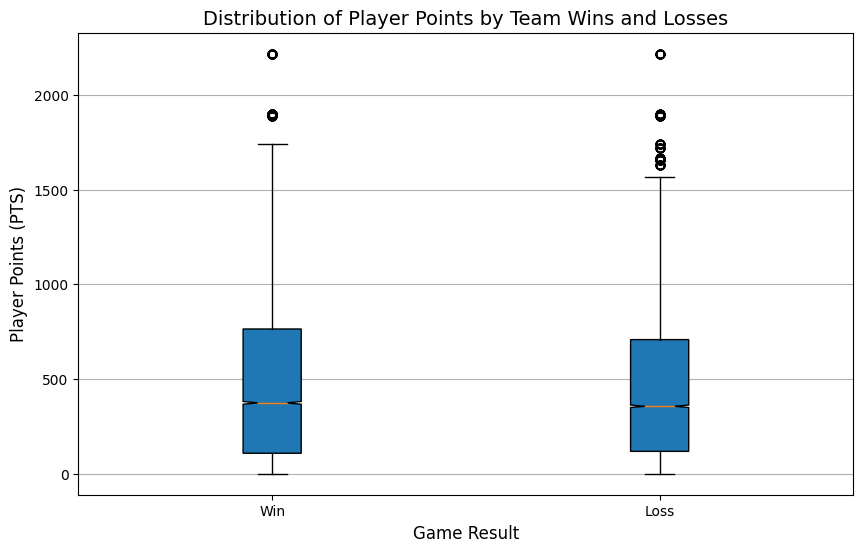

In [59]:
# Visual 1: Box plot for individual player points grouped by team wins
import matplotlib.pyplot as plt

# Add a column for win indicator (1 for Win, 0 for Loss)
combined_dataset['Win_Indicator'] = combined_dataset['game_result'].apply(lambda x: 1 if x == 'W' else 0)

plt.figure(figsize=(10, 6))
plt.boxplot([combined_dataset[combined_dataset['Win_Indicator'] == 1]['PTS'],
             combined_dataset[combined_dataset['Win_Indicator'] == 0]['PTS']],
            labels=['Win', 'Loss'], patch_artist=True, notch=True)

plt.title("Distribution of Player Points by Team Wins and Losses", fontsize=14)
plt.xlabel("Game Result", fontsize=12)
plt.ylabel("Player Points (PTS)", fontsize=12)
plt.grid(axis='y')
plt.show()

### Visualization 1: Distribution of Player Points by Team Wins and Losses

This box plot illustrates the distribution of individual player points (PTS) for games categorized as either wins or losses. The results are grouped by the game outcome (`Win` or `Loss`), allowing for a comparative analysis of player contributions in different scenarios.

**Observations**:
- The median points scored by players in games won (`Win`) is generally higher than in games lost (`Loss`).
- There is significant overlap in the interquartile ranges (IQR) of player points between wins and losses, indicating that high-scoring performances do not always guarantee a win.
- Outliers are visible in both groups, with some players achieving exceptionally high scores in both winning and losing games. 
- The spread of points (as shown by the whiskers) is slightly larger for losses, suggesting more variability in player contributions during lost games.

This visualization highlights the variability in individual player contributions across wins and losses, reinforcing the idea that while scoring is important, team success often depends on multiple factors.

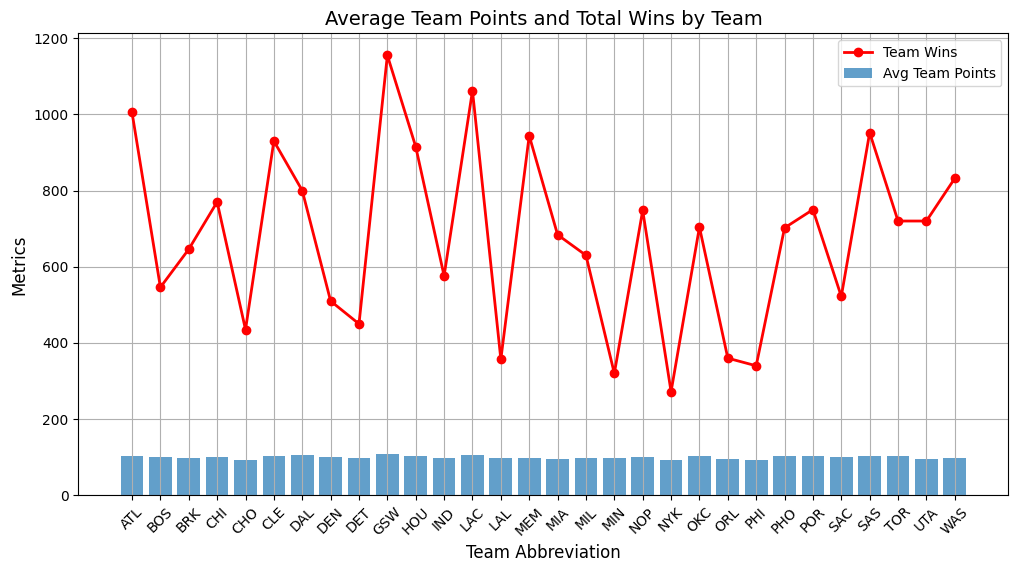

In [60]:
# Visual 2: Bar chart for average team points vs. team success
average_team_points = combined_dataset.groupby('Tm')['Team_PTS'].mean()
team_wins = combined_dataset[combined_dataset['game_result'] == 'W'].groupby('Tm')['game_result'].count()

plt.figure(figsize=(12, 6))
plt.bar(average_team_points.index, average_team_points.values, label="Avg Team Points", alpha=0.7)
plt.plot(team_wins.index, team_wins.values, marker='o', color='r', label="Team Wins", linestyle='-', linewidth=2)
plt.title("Average Team Points and Total Wins by Team", fontsize=14)
plt.xlabel("Team Abbreviation", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Metrics", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Visualization 2: Average Team Points and Total Wins by Team
This bar and line chart compares the average team points (Team_PTS) and total wins (Team Wins) for each team during the 2015 season.

**Observations**:
- Teams like the Golden State Warriors (GSW) and Atlanta Hawks (ATL) stand out with high win totals and relatively high average team points.
- However, some teams (e.g., Houston Rockets) exhibit moderate win totals despite having high average team points, indicating that other aspects of the game influence success.
- Lower-performing teams, such as the Minnesota Timberwolves (MIN), had low average points and low win totals, suggesting a direct correlation for such teams.

This visualization illustrates the relationship between team scoring ability and success, providing insights into how consistent team-level performance can impact overall outcomes.

### **5.2:** Reflection

In this project, the analysis shows the significant role of individual performance and team strategies in determining NBA team success. If I had more time, I would investigate advanced metrics, such as player efficiency ratings or defensive contributions, to better explain team outcomes. Exploring trends across multiple seasons or additional datasets, such as playoff statistics, could further validate these findings. This project underscores the importance of combining data wrangling and domain-specific analysis to uncover actionable insights.

In [62]:
import zipfile

# List of files to include in the ZIP
files_to_zip = [
    "Data_Wrangling_Project_Starter.ipynb",
    "Seasons_Stats.csv",
    "filtered_team_stats_2015.csv",
    "filtered_all_seasons_2015.csv",
    "cleaned_nba_player_stats_2015.csv",
    "cleaned_nba_team_stats_2015.csv",
    "combined_nba_stats_2015.csv",
]

# Create a ZIP file
with zipfile.ZipFile("Real World Data Wrangling.zip", "w") as zipf:
    for file in files_to_zip:
        zipf.write(file)

print("ZIP file created successfully: Real World Data Wrangling.zip")

ZIP file created successfully: Real World Data Wrangling.zip
